In [1]:
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
mnist = fetch_openml('mnist_784')
digits = load_digits()

In [2]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


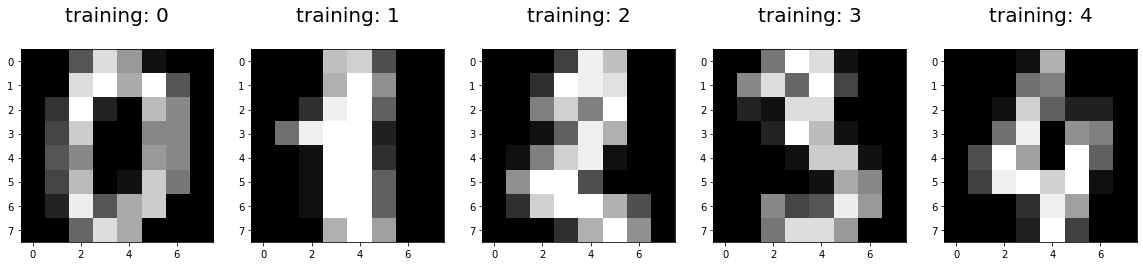

In [3]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],
    digits.target[0:5])):
    plt.subplot(1,5,index +1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('training: %i\n' % label,fontsize=20)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)

In [5]:
reg = LogisticRegression(solver='lbfgs', max_iter=100)
reg.fit(X_train, y_train)

C:\Users\tomjo\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
reg.predict(X_test[0].reshape(1,-1))

array([2])

In [7]:
reg.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [8]:
predictions = reg.predict(X_test)

In [9]:
score = reg.score(X_test, y_test)

In [10]:
print(score)

0.9511111111111111


In [11]:
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Text(0.5, 1.0, 'Accuracy score:0.9511111111111111')

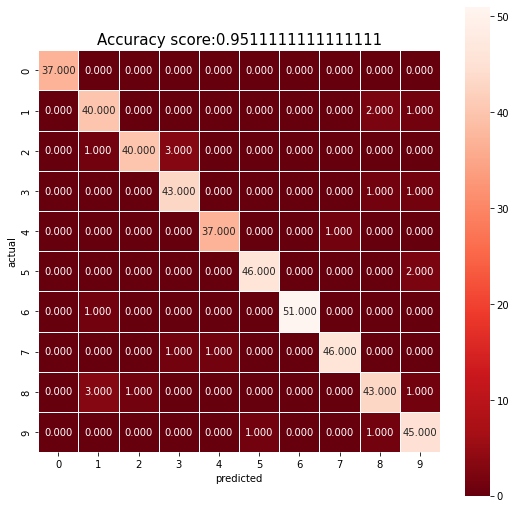

In [12]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5, square = True, cmap='Reds_r')
plt.ylabel('actual')
plt.xlabel('predicted')
title = f'Accuracy score:{score}'
plt.title(title,size=15)

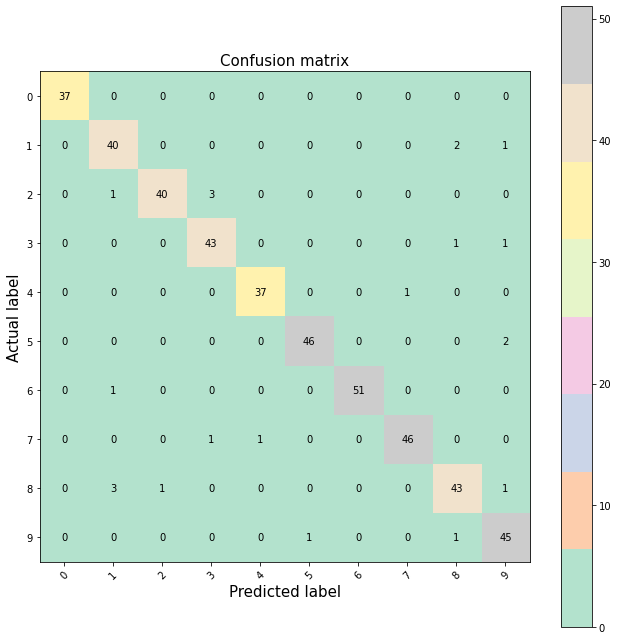

In [13]:
plt.figure(figsize=(9, 9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel2')
plt.title('Confusion matrix', size=15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5",
           "6", "7", "8", "9"], rotation=45, size=10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4",
           "5", "6", "7", "8", "9"], size=10)
plt.tight_layout()
plt.ylabel('Actual label', size=15)
plt.xlabel('Predicted label', size=15)

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x),
                     horizontalalignment='center',
                     verticalalignment='center')


In [14]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [15]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
 mnist.data, mnist.target, test_size=1/7.0, random_state=0)

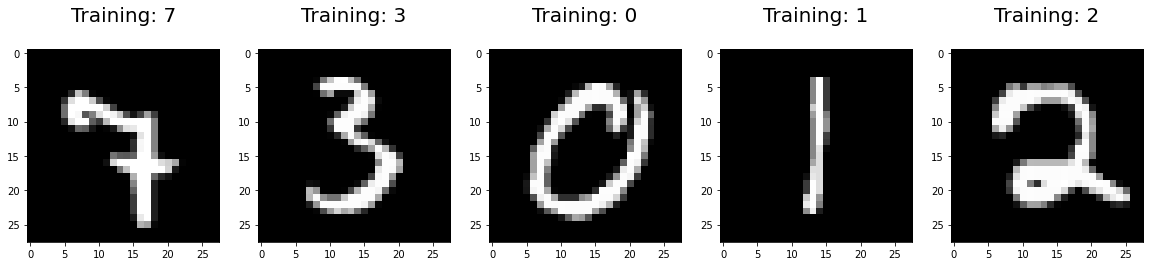

In [16]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(train_img[0:5].values, train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' %int(label), fontsize=20)


In [17]:
reg2 = LogisticRegression(solver='lbfgs', max_iter=100)

In [18]:
reg2.fit(train_img,train_lbl)

C:\Users\tomjo\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
reg2.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [20]:
predictions2 = reg2.predict(test_img)

In [21]:
score2 = reg2.score(test_img,test_lbl)

In [22]:
score2

0.9184

In [46]:
index = 0
faults = []
for label, predict in zip(test_lbl, predictions2):
    if label != predict:
        faults.append((index))
        index += 1
        
test_img = test_img.to_numpy()
test_lbl = test_lbl.to_numpy()

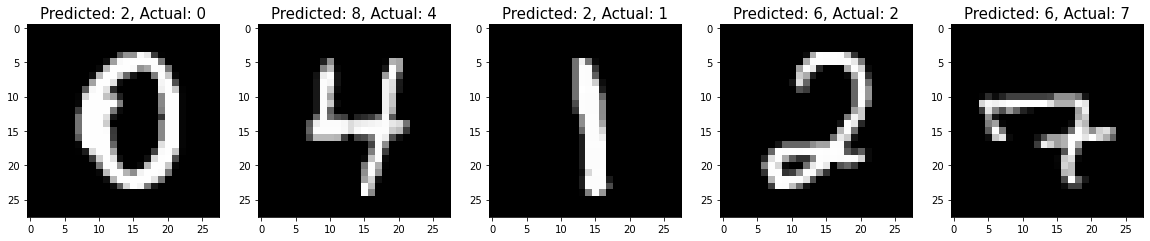

In [47]:
plt.figure(figsize=(20, 4))
for plotIndex, badIndex in enumerate(faults[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28, 28)), cmap=plt.cm.gray)
    title = 'Predicted: {}, Actual: {}'.format(
        predictions[badIndex], test_lbl[badIndex])
    plt.title(title, fontsize=15)
